In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [87]:
### constants
LABELS = ['Normal', 'Fraud']
RANDOM_SEED = 105
UPDATE_SIZE = 0.3
TEST_SIZE = 0.2
DATASET_PATH = Path('../creditcard.csv')

In [88]:
### data reading
df = pd.read_csv(DATASET_PATH)

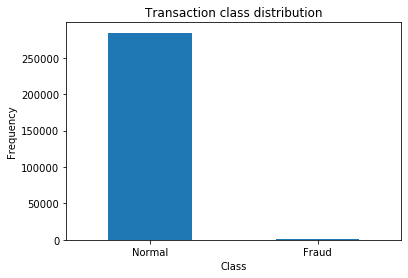

In [4]:
### describe dataset by classes
count_classes = pd.value_counts(df['Class'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [89]:
### data preparing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### преобразуем данные, убираем колонку "время", т.к. она ни на что не влияет
data = df.drop(['Time'], axis=1)
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

### отделяем X от Y
Y = data['Class'].values
X = data.drop(['Class'], axis=1).values

#stratify +

### делим данные
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=UPDATE_SIZE, random_state=RANDOM_SEED, stratify=Y)

In [6]:
### количество мошенничеств в тестовых данных
sum(Y_test)

89

In [95]:
### Creating model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1, n_jobs=-1)

In [96]:
### train model
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [97]:
import joblib

file_name = 'model_1000.pkl'

In [98]:
### saving model
with open(file_name, 'wb') as f:
    joblib.dump(model, f, compress=1)

In [42]:
### loading model
with open(file_name, 'rb') as f:
    model = joblib.load(file_name)

In [94]:
import numpy as np

predictions = model.predict_proba(X_test)

In [14]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, predictions, target_names=LABELS)
print(report)

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56873
       Fraud       0.92      0.80      0.86        89

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



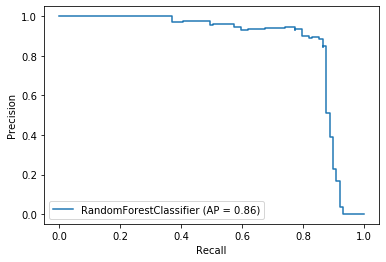

In [35]:
### Precision-recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(model, X_test, Y_test)

In [36]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test, predictions)

0.898823655386721

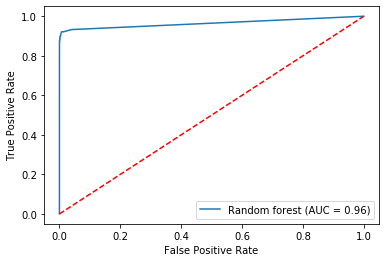

In [85]:
# ROC_AUC
from sklearn.metrics import plot_roc_curve

svc_disp = plot_roc_curve(model, X_test, Y_test, name='Random forest')
plt.plot([0,1],[0,1],'r--')
plt.show()

In [ ]:
plt.savefig('fname.svg', dpi=300, facecolor='w', edgecolor='red',
        orientation='portrait', papertype=None, format=None,
        transparent=True, bbox_inches=None, pad_inches=0.1)